In [1]:
import re
import nltk


from collections import Counter, OrderedDict
from sklearn.base import TransformerMixin,BaseEstimator
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams
import numpy as np
import hashlib
import math
import pandas as pd 
import matplotlib.pyplot as plt
import random
import string
from nltk.tokenize import WordPunctTokenizer

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import SVC
import spacy
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import preprocessing

from bs4 import BeautifulSoup
from spacy.lang.en import English

from pylab import barh,plot,yticks,show,grid,xlabel,figure,cla,close
from sklearn.linear_model import LinearRegression

# Regex

. - matches any character, except newline.

\d, \s \S - match digit, match whitespace, not whitespace.

\b, \B - word, not word boundary.

[xyz] - matches x, y or z.

[^xyz] - matches anything that is not x, y or z.

[x-z] - matches a character between x and z.

^xyz$ - ^ is the start of the string, $ is the end of the string.

\. - use escaping to match special characters.

\t, \n - matches tab and newline.

x* - matches 0 or more symbols x.

x+ - matches 1 or more symbols x.

x? - matches 0 or 1 symbol x.

.?, *?, +?, etc - represent non-greedy search.

x{5} - matches exactly 5 symbols x.

x{5,} - matches 5 or more symbols x.

x{5, 8} - matches between 5 and 8 symbols x.

xy|yz - matches xy or yz.

# Search,findall,finditer

In [ ]:
match = re.search("someword", text)
match = re.findall('someword',text)
match = re.finditer('someword',text)

# The following regex will find all whole words start with capital and continuou with lowercase letter

In [ ]:
re.findall("[A-Z][a-z]+", text)   #if we have multiline text we need to input re.MULTILINE as an arument inside re.findall()

# Tokenizers

In [ ]:
# we can define tokenizer according to the text we have by ourselves
tokenizer = RegexpTokenizer('[A-Z]\w+')
# we also can use predefined tukenizer as follows
#BlanklineTokenizer - Tokenize a string using blank lines as delimiter.
#WordPunctTokenizer - Tokenize a string into alphabetic and non-alphabetic characters.
#WhitespaceTokenizer- Tokenize a string using spaces, tabs and newlines as delimiters.
from nltk.tokenize import BlanklineTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import WhitespaceTokenizer
tokenizer = BlanklineTokenizer
#Then we use it to split out text
tokens = tokenizer.tokenize(text)


# Stemmer

In [ ]:
nltk.download('stopwords')
stemmer = SnowballStemmer("english", ignore_stopwords=True)
stems = [list(map(stemmer.stem, words))]

# Ngrams

In [ ]:
#After tokenization we can use Ngrams.(words is the list of tokenize text or list of words)
list(ngrams(words, 1))
list(ngrams(words, 2))
list(ngrams(words, 3))

# Read the data

In [2]:
#Load the dataset
##there are two columns in the data set sentiment which is positive and negative and text columns this is movie review
#df = pd.read_csv('./datasets/twitter.csv')
df = pd.read_csv('./datasets/spam.csv', encoding='latin1')
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1,inplace=True)
df.rename(columns={"v1":"target", "v2":"text"},inplace=True)
df.head()
#NOTE: If the data set is so many choose part of that in order to accelerate the process of analysing
    ##docs = df.text[:200]
# Get the text
#docs = df['text']



###we can read from file and represent it as list as follows
#def file_to_list(file_name):
    #with open(file_name, 'r', encoding='utf-8') as f:
        #return [line.strip() for line in f.readlines()]
    
#X_train_pre = file_to_list('data/tweets_train_preprocessed.txt')
#X_dev_pre = file_to_list('data/tweets_dev_preprocessed.txt')
#X_test_pre = file_to_list('data/tweets_test_preprocessed.txt')

##############################################################Read a JSON file################################

#docs = []
#with open('./datasets/sample_data.json') as fp:
    #for line in fp:
        #entry = json.loads(line)
        #docs.append(entry['body'])
        
#print('I read {} documents'.format(len(docs)))

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Encoding the target coulmns to 0 and 1

In [3]:
# Encode the labels
le = preprocessing.LabelEncoder()
le.fit(df['target'].values)
df['target'] = le.transform(df['target'].values)
df


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Split raw data without cleaning to train and validation

In [4]:
# Split in train and validation
train_nc_df, validation_nc_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
validation_nc_df.target

3245    0
944     0
1044    1
2484    0
812     1
       ..
4264    0
2439    0
5556    0
4205    0
4293    1
Name: target, Length: 1115, dtype: int64

# Cleaning the data

In [6]:
# Custom transformer to implement sentence cleaning
class TextCleanerTransformer(TransformerMixin):
    def __init__(self, tokenizer, stemmer, regex_list,
                 lower=True, remove_punct=True):
        self.tokenizer = tokenizer
        self.stemmer = stemmer
        self.regex_list = regex_list
        self.lower = lower
        self.remove_punct = remove_punct
        
    def transform(self, X, *_):
        X = list(map(self._clean_sentence, X))
        return X
    
    def _clean_sentence(self, sentence):
        
        # Replace given regexes
        for regex in self.regex_list:
            sentence = re.sub(regex[0],regex[1], sentence)
            
        # lowercase
        if self.lower:
            sentence = sentence.lower()

        # Split sentence into list of words
        words = self.tokenizer.tokenize(sentence)
            
        # Remove punctuation
        if self.remove_punct:
            words = list(filter(lambda x: x not in string.punctuation, words))

        # Stem words
        if self.stemmer:
            words = map(self.stemmer.stem, words)

        # Join list elements into string
        sentence = " ".join(words)
        
        return sentence
    
    def fit(self, *_):
        return self

# Cleaning the data by function not class

In [7]:

tokenizer = WordPunctTokenizer()

def remove_html_tags(text):
    soup = BeautifulSoup(text)
    return soup.get_text()

def remove_punct(text):
    #remove everything except words, digits and space
    text = re.sub(r'[^\w\s]','',text) 
        
    #regex often miss the underscore so let's remove that as well
    text = re.sub(r'\_','',text)
    text = text.lower()
    
    return text

def remove_stopwords(text, stopwords):
    tokens = tokenizer.tokenize(text)
    tokens = [tok.lower() for tok in tokens]
    if stopwords:
        tokens = [tok for tok in tokens if tok not in stopwords]
    tokens = [stemmer.stem(tok) for tok in tokens]

    text_processed = ' '.join(tokens)
    return text_processed



def preprocessing_(df):
    """
    Implement the three above functions in the respective order to remove html tags, punctuations and stopwords
    Hint: Use the apply function.
    
    """
    df_ = df.copy()
    
    #df_['text'] = df_['text'].apply(...).apply(...).apply(...)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    df_['text'] = df_['text'].apply(remove_html_tags).apply(remove_punct).apply(remove_stopwords,stopwords=en_stopwords)
    return df_

In [8]:
# Initialize a tokenizer and a stemmer
tokenizer = WordPunctTokenizer()
stemmer = SnowballStemmer("english", ignore_stopwords=True)
#regex_list = [("<[^>]*>", "")]
regex_list = [("\#","")]

#cleaner = TextCleanerTransformer(tokenizer, stemmer, regex_list)
#docs = cleaner.transform(train_df.text.values)

# Define pipline and predict MultinomialNB()

In [9]:

# Build the pipeline
text_clf = Pipeline([('prep', TextCleanerTransformer(tokenizer, stemmer, regex_list)),
                   ('vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('clf', MultinomialNB())])
# Train the classifier
##text_clf.fit(map(str, train_df['text'].values), train_df['sentiment'].values)
text_clf.fit(map(str, train_nc_df['text'].values), train_nc_df['target'].values)

##predicted = text_clf.predict(map(str, validation_df['text'].values))
##np.mean(predicted == validation_df['sentiment'])

predicted = text_clf.predict(map(str, validation_nc_df['text'].values))
np.mean(predicted == validation_nc_df['target'])

0.9605381165919282

# Define pipeline and predict RandomForrestcalssifier

In [10]:
# Build the pipeline
text_clf = Pipeline([('prep', TextCleanerTransformer(tokenizer, stemmer, regex_list)),
                   ('vect', CountVectorizer(stop_words='english', ngram_range=(1,2))),
                   ('tfidf', TfidfTransformer()),
                   ('classifier', RandomForestClassifier(random_state = 42))])
# Train the classifier
##text_clf.fit(map(str, train_df['text'].values), train_df['sentiment'].values)
text_clf.fit(map(str, train_nc_df['text'].values), train_nc_df['target'].values)

##predicted = text_clf.predict(map(str, validation_df['text'].values))
##np.mean(predicted == validation_df['sentiment'])

predicted = text_clf.predict(map(str, validation_nc_df['text'].values))
np.mean(predicted == validation_nc_df['target'])

0.9739910313901345

# Check classification result

In [11]:
# check the results
##print(classification_report(y_dev, y_dev_pred))
print(classification_report(validation_nc_df['target'].values,predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# How to counts the number of occurrences of different tokens in a list and whole corpus

In [ ]:
def build_vocabulary():
    vocabulary = Counter()

    for doc in docs:
        words = doc.split()
        vocabulary.update(words)
    
    return OrderedDict(vocabulary.most_common())
# turn into a list of tuples and get the first 20 items
list(build_vocabulary().items())[:20]

# Information Extraction from text

In [12]:
# Here we are disabling the synctatic parser from pipeline to improve speed.
nlp = spacy.load('en_core_web_sm', disable=['parser'])
en_stopwords = nlp.Defaults.stop_words
###################################################Clean data with the functions not classes
df_clean = preprocessing_(df)
df_clean

# define docs as a list of sentences

docs = list(df_clean.text.values)

In [13]:
#We are going to use the function pipe to process all documents.
# One of the strenghts for SpaCy is the parallel processing using all your computer cores.
# In this step, SpaCy performs the NLP pipeline for all the docs, so it may take a while

docs = list(nlp.pipe(docs))

In [14]:
docs[0].ents

(jurong point crazi, bugi n great world la e buffet cine)

In [15]:
#Matcher ans pass vocabulary to it
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab) # Pass the vocabulary object to Matcher.__init__()
pattern = [{'POS': 'ADV'},{'POS':'ADJ'}]
matcher.add('word',None,pattern)

In [16]:
##Extracting adjectives,
for i, doc in enumerate(docs[:400]):
    #print(i,doc)
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]  # the matched span
        print(i, start, end, span)
   

363 6 8 forward final


# Extracting locations

In [17]:
for i, doc in enumerate(docs[:400]):
    for e in doc.ents:
        if e.label_ == 'GPE':   
            print(i, e.text, e.start_char, e.end_char)

19 england 0 7
19 macedonia 10 19
19 scotland 94 102
34 uk 24 26
49 hospit 69 75
54 new jersey 12 22
54 detroit 29 36
103 boston 37 43
103 boston 97 103
134 uk 66 68
147 qatar 32 37
195 hav 14 17
265 wana 0 4
334 å1000 25 30
355 qatar 71 76
355 insha 77 82
384 orang 39 44
398 india 139 144


# Extracting entities

In [18]:
matcher = Matcher(nlp.vocab)
#
pattern = [{'ENT_TYPE':'GPE'}]
matcher.add('LOC', None, pattern)
#matcher.add(...)
most_common_ents_list = []
for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]  # the matched span
        span_text = span.text  # the span as a string
        most_common_ents_list.append(span_text)
most_common_ents = Counter(most_common_ents_list).most_common(10)
most_common_ents

[('orang', 18),
 ('uk', 14),
 ('india', 11),
 ('london', 6),
 ('boston', 5),
 ('landlin', 5),
 ('hospit', 4),
 ('å1000', 4),
 ('futur', 4),
 ('atlanta', 4)]

# Adding even more features

In [19]:
#number of adjectives
name_of__adjs = [[token for token in doc if token.pos_ == 'ADJ'] for doc in docs]
n_adjs = [len(internal_list) for internal_list in name_of__adjs]
#####df['n_adjs'] = n_adjs
##Emoji

nlp = English()  # We only want the tokenizer, so no need to load a model
matcher = Matcher(nlp.vocab)

pos_patterns = [{'TEXT':{"REGEX": r"\:\)"}}] #- For Positive emoji let's use ":)"
neg_patterns = [{'TEXT':{"REGEX": r"\:\("}}] #- For Negative emoji let's use ":("

# Hint - Don't forget to escape the special character "(" and ")"
# YOUR CODE HERE
#raise NotImplementedError()

def count_emoji_matches(pattern, docs = docs):
    matcher = Matcher(nlp.vocab)
    matcher.add("EMOJIS", None, pattern)
    
    n_emojis = []
    for doc in docs:
        matches = matcher(doc)
        emojis_count = len(matches)
        for match in matches:
            emojis_count += 1
        n_emojis.append(emojis_count)
            
    return n_emojis

positive_emojis_count = sum(count_emoji_matches(pos_patterns))
negative_emojis_count = sum(count_emoji_matches(neg_patterns))



##df['positive_emojis_count'] = count_emoji_matches(pos_patterns)
##df['negative_emojis_count'] = count_emoji_matches(neg_patterns)

# Adding more extra features

In [20]:
df_clean['length'] = df_clean['text'].map(len)# we test if this feature is ok or not by plotting in the next cell we can do it for all the new features if it is skew to right and left it is important otherwise not inmportant
df_clean['words'] = df_clean['text'].str.split().map(len)
stop_words = nltk.corpus.stopwords.words('english')
df_clean['words_not_stopword'] = df_clean['text'].apply(lambda x: len([t for t in x.split() if t not in stop_words]))
df_clean['commas'] = df_clean['text'].str.count(',')
df_clean['upper'] = df_clean['text'].map(lambda x: map(str.isupper, x)).map(sum)
df_clean['capitalized'] = df_clean['text'].map(lambda x: map(str.istitle, x)).map(sum)
#get the average word length
#df_clean['avg_word_length'] = df_clean['text'].apply(lambda x: np.mean([len(t) for t in x.split() if t not in stop_words]) if len([len(t) for t in x.split(' ') if t not in stop_words]) > 0 else 0)
#number of adjective
df_clean['n_adjs'] = n_adjs
df_clean['positive_emojis_count'] = count_emoji_matches(pos_patterns)
df_clean['negative_emojis_count'] = count_emoji_matches(neg_patterns)
df_clean


,target,text,length,words,words_not_stopword,commas,upper,capitalized,n_adjs,positive_emojis_count,negative_emojis_count
0,0,jurong point crazi avail bugi n great world la...,73,15,15,0,0,0,1,0,0
1,0,ok lar joke wif u oni,21,6,6,0,0,0,0,0,0
2,1,free entri 2 wkli comp win fa cup final tkts 2...,128,22,22,0,0,0,1,0,0
3,0,u dun earli hor u c,19,6,6,0,0,0,0,0,0
4,0,nah dont think goe usf live,27,6,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5567,1,2nd time tri 2 contact u u won å750 pound priz...,100,19,18,0,0,0,1,0,0
5568,0,ì b go esplanad fr home,23,6,6,0,0,0,0,0,0
5569,0,piti mood soani suggest,23,4,4,0,0,0,0,0,0
5570,0,guy bitch act like id interest buy week gave free,49,10,10,0,0,0,1,0,0


In [21]:
df_clean.isnull().sum()

target                   0
text                     0
length                   0
words                    0
words_not_stopword       0
commas                   0
upper                    0
capitalized              0
n_adjs                   0
positive_emojis_count    0
negative_emojis_count    0
dtype: int64

# Is this feature usefull?(by the plot the length is  useful)

(0.0, 300.0)

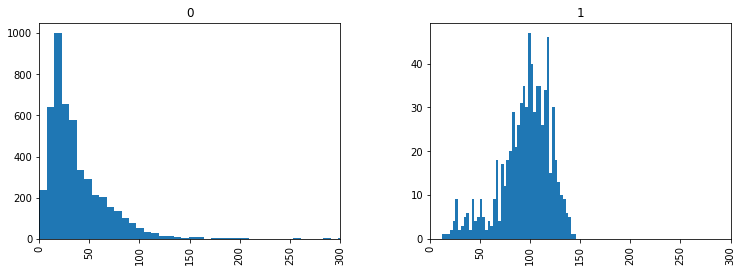

In [22]:
ax_list = df_clean.hist(column='length', by='target', bins=50,figsize=(12,4))
ax_list[0].set_xlim((0,300))
ax_list[1].set_xlim((0,300))

# Class for choosing extra features

In [23]:
class Selector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a column from the dataframe to perform additional transformations on
    """ 
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    

class TextSelector(Selector):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on text columns in the data
    """
    def transform(self, X):
        return X[self.key]
    
    
class NumberSelector(Selector):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def transform(self, X):
        return X[[self.key]]
    
    

# Define a pipeline

In [30]:
text = Pipeline([
                ('selector', TextSelector("text")),
                ('tfidf', TfidfVectorizer())
            ])

length =  Pipeline([
                ('selector', NumberSelector("length")),
                ('standard', StandardScaler())
            ])

words =  Pipeline([
                ('selector', NumberSelector(key='words')),
                ('standard', StandardScaler())
            ])
words_not_stopword =  Pipeline([
                ('selector', NumberSelector(key='words_not_stopword')),
                ('standard', StandardScaler())
            ])
#avg_word_length =  Pipeline([
 #               ('selector', NumberSelector(key='avg_word_length')),
  #              ('standard', StandardScaler())
   #         ])
commas =  Pipeline([
                ('selector', NumberSelector(key='commas')),
                ('standard', StandardScaler()),
            ])
upper =  Pipeline([
                ('selector', NumberSelector(key='upper')),
                ('standard', StandardScaler()),
            ])
capitalized =  Pipeline([
                ('selector', NumberSelector(key='capitalized')),
                ('standard', StandardScaler()),
            ])

#n_adjs = Pipeline(['selector', NumberSelector(key='n_adjs'),
                  # ('standard', StandardScaler()),
                 # ])

positive_emojis_count  = Pipeline([
                ('selector', NumberSelector("positive_emojis_count"))
            ])
negative_emojis_count = Pipeline([
               ('selector', NumberSelector("negative_emojis_count"))
            ])


feats = FeatureUnion([('text', text), 
                      ('length', length),
                      ('words', words),
                      ('words_not_stopword', words_not_stopword),
                      #('avg_word_length', avg_word_length),
                      ('commas', commas),
                     ('upper', upper),
                     ('capitalized', capitalized),
                     #('n_adjs',n_adjs),
                      ('positive_emojis_count',positive_emojis_count),
                      ('negative_emojis_count',negative_emojis_count),
                     ])

feature_processing = Pipeline([('feats', feats)])

In [ ]:
#df_clean = df_clean.reset_index(drop = True)
#df_clean

# Split train and test of clean data and fitting the model and predicting

In [31]:
# Split in train and validation
train_cl_data, test_cl_data = train_test_split(df_clean, test_size=0.2, random_state=42)



In [32]:
train_cl_data.isnull().sum()

target                   0
text                     0
length                   0
words                    0
words_not_stopword       0
commas                   0
upper                    0
capitalized              0
n_adjs                   0
positive_emojis_count    0
negative_emojis_count    0
dtype: int64

In [34]:
pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
    #('classifier', LinearRegression()),
])

pipeline.fit(train_cl_data, train_cl_data.target)

preds = pipeline.predict(test_cl_data)
np.mean(preds == test_cl_data.target)

0.9748878923766816

# How to reduce the features and choose the more important one
1- Feature Selection from chi-squared
2-Feature selection with SVD and PCA

# # The following will plot the  most dependent features from the chi-squared values.

In [35]:
nltk.download("stopwords") 
stopword_list =list(nltk.corpus.stopwords.words("english"))

[nltk_data] Downloading package stopwords to /home/sonia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#preprocess to run the following cell about chi_values
#df is already clean data
#Encode the lables y_train and y_dev
vec = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vec.fit_transform(train_cl_data.text)
X_test_vec = vec.transform(test_cl_data.text)


In [38]:
chi_values, p_values = chi2(X_train_vec, train_cl_data.target.values)
print(chi_values, p_values)

[2.40746282 2.40746282 1.25971294 ... 0.03392648 0.04899284 0.02654208] [0.12075794 0.12075794 0.26170543 ... 0.85386329 0.82482516 0.87058346]


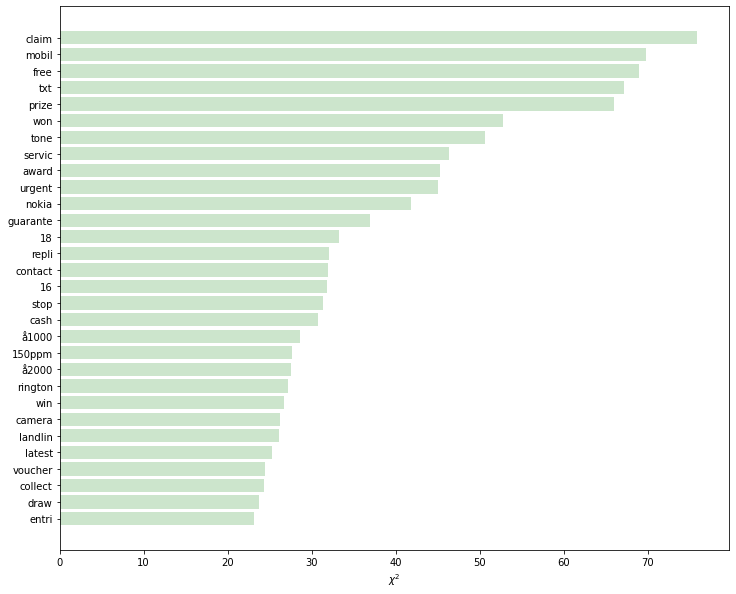

In [39]:
feature_names = vec.get_feature_names()

cla()   # Clear axis
close() # Close a figure window

figure(figsize=(12,10))
zipped_chi_squared = zip(feature_names, chi_values)
sorted_chi_values = sorted(zipped_chi_squared, key=lambda x:x[1]) 
top_chi_values = list(zip(*sorted_chi_values[-30:]))

x = range(len(top_chi_values[1]))
labels = top_chi_values[0]
barh(x, list(top_chi_values)[1], align='center', alpha=.2, color='g')
yticks(x, labels)
xlabel('$\chi^2$')
show()

# Ch2 choose best features

In [40]:
ch2 = SelectKBest(chi2, k=10)
ch2.fit(X_train_vec, train_cl_data.target)

most_important_features = [feature_names[i] for i in ch2.get_support(indices=True)]
for f in most_important_features:
    print(f)

award
claim
free
mobil
prize
servic
tone
txt
urgent
won


# Prediction

In [42]:
X_train_chi = ch2.transform(X_train_vec)
X_test_chi = ch2.transform(X_test_vec)

clf = MultinomialNB()
%timeit clf.fit(X_train_chi, train_cl_data.target)

y_pred = clf.predict(X_test_chi)

856 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# acuracy score

In [43]:
np.mean(test_cl_data.target==y_pred)
accuracy_score(y_pred, test_cl_data.target)

0.8654708520179372

# Reduction by SVD

In [ ]:
dense_X_train = train_cl_data.text.toarray()
data_var = np.var(dense_X_train, axis=0).sum()


# reduction and prediction

In [45]:
svd = TruncatedSVD(n_components=10, random_state=42)
%timeit svd.fit(train_cl_data.text)
X_train_svd = svd.transform(train_cl_data.text)
X_test_svd =  svd.transform(test_cl_data.text)
    #print('\nVariance:')
   # print(np.var(X_train_svd, axis=0).sum())
    #true_variance.append(1.0*np.var(X_train_svd, axis=0).sum() / data_var)
    #explained_variance.append(svd.explained_variance_)
    
clf =  KNeighborsClassifier()
clf.fit(X_train_svd, train_cl_data.target)
y_pred = clf.predict(X_test_svd)
    
accuracies.append(accuracy_score(y_pred, test_cl_data.target))
print('Accuracy: {}'.format(accuracy_score(y_pred, test_cl_data_target)))

ValueError: could not convert string to float: 'im boat mom check yo im half nake'